In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.image as mpimg
import splitfolders
import cv2
import glob



In [2]:

# FIXING IMAGES EXTENSIONS

for name in glob.glob("/car_plates/train_pics/*"):
    if '.JPG' in name:
        os.rename(name,name.replace('JPG','jpg'))


train_dataset=pd.read_csv(r'/car_plates/train_data.csv')
dataset=pd.read_csv(r'/car_plates/PoolLabels.csv')
dataset.head()

,img.name,label
0,car001.jpg,ر ب ل ١ ٨ ٢ ٧
1,car002.jpg,ى ن ر ٤ ٦ ٢ ٥
2,car003.jpg,ع س ط ١ ٣ ٧ ٥
3,car004.jpg,أ ج س ٤ ١ ٤ ٧
4,car005.jpg,ق ج ل ٢ ٧ ٣ ٩


In [3]:
# FUNCTION TO REFORMAT THE LABELS IN DATASET

def formatLabels(labels):
    count = 0
    labels = labels.apply(lambda x: x.replace(' ',''))
    labels = labels.apply(lambda x: x + "+"*(7-len(x)))
    labels = labels.apply(lambda x: list(x))        
    return labels

# FUNCTION TO REFORMAT THE IMAGES NAMES IN DATASET


def checkName(name):
    if 'JPG' in name:
        return name.replace('JPG','jpg')
    elif '.jpg' not in name:
        return name + '.jpg'
    else:
        return name
    
# RUNNING BOTH FUNCTIONS ON DATASET    
    
dataset['img.name']=dataset['img.name'].apply(checkName)
dataset['label'] = formatLabels(dataset.label)    

In [4]:
from keras.layers import StringLookup

arabic_num_alph={
    "١":'1',
    "٢":'2',
    "٣":'3',
    "٤":'4',
    "٥":'5',
    "٦":'6',
    "٧":'7',
    "٨":'8',
    "٩":'9',
    '+':'0',
    "أ":'11',
    'ص':'12',
    'ف':'13',
    'ل':'14',
    'ح':'15',
    'س':'16',
    'د':'17',
    'ي':'18',
    'ر':'19',
    'ز':'19',
    'ن':'20',
    'ك':'21',
    "ب":'22',
    'ط':'23',
    'ا':'11',
    'ج':'24',
    'ى':'18',
    'م':'25',
    'ق':'26',
    'ع':'27', 
    'ه':'28',
    "و":'29'
            }


# MAKING ARABIC LETTERS AND NUMBERS TO ENGLISH NUMBERS AS SYMBOLS

for index, label in enumerate(dataset['label']):
    for char in label:
        if(char in arabic_num_alph.keys()):    
            # label=  list(map(lambda x: x.replace(char, arabic_num_alph.get(char)), label))
            i = label.index(char)
            label=label[:i]+[arabic_num_alph.get(char)]+label[i+1:]
            dataset['label'][index]=label
        else:
            print(index)
            dataset.drop(index=index,inplace=True)
            
            break
           
            
        
    
            
# ONE HOT ENCODIN THE LABELS INTO MATRIX(7,30)

# for index, label in enumerate(dataset['label']):
#     matrix = np.zeros(shape=(7,30))
#     for char in label:
#         i = label.index(char)
#         column=int(char)
#         matrix[i][column]=1
#     dataset['label'][index]=matrix
        
            
          
# label 2000 IS CORRUPTED


2049
2050
2051
2055
2056
2057
2058
2059
2060
2061
2089
2116
2127
2133
2150
2151
2244
2367
2368
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434
2435
2436
2437
2438
2439
2440
2441
2442
2443
2444
2445
2446
2447
2448
2449
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
2460
2461
2462
2463
2464
2465
2466
2467
2468
2469
2470
2471
2472
2473
2474
2475
2476
2477
2478
2479
2480
2481
2482
2483
2484
2485
2486
2487
2488
2489
2490
2491
2492
2493
2494
2495
2496
2497
2498
2499
2500
2501
2502
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516
2758
2894


In [5]:


for index in range(1999):
   train_dataset = train_dataset.append(dataset.iloc[index])
  

C:\Users\Ahmed Medhat\AppData\Local\Temp\ipykernel_15376\724131912.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_dataset = train_dataset.append(dataset.iloc[index])
C:\Users\Ahmed Medhat\AppData\Local\Temp\ipykernel_15376\724131912.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_dataset = train_dataset.append(dataset.iloc[index])
C:\Users\Ahmed Medhat\AppData\Local\Temp\ipykernel_15376\724131912.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_dataset = train_dataset.append(dataset.iloc[index])
C:\Users\Ahmed Medhat\AppData\Local\Temp\ipykernel_15376\724131912.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

In [6]:
# print(train_dataset['img.name'][99])
# train_dataset['label'][99]
for i in range(1999):
    print(train_dataset.iloc[i,0])

car001.jpg
car002.jpg
car003.jpg
car004.jpg
car005.jpg
car006.jpg
car007.jpg
car008.jpg
car009.jpg
car010.jpg
car011.jpg
car012.jpg
car013.jpg
car014.jpg
car015.jpg
car016.jpg
car017.jpg
car018.jpg
car019.jpg
car020.jpg
car021.jpg
car022.jpg
car023.jpg
car024.jpg
car025.jpg
car026.jpg
car027.jpg
car028.jpg
car029.jpg
car030.jpg
car031.jpg
car032.jpg
car033.jpg
car034.jpg
car035.jpg
car036.jpg
car037.jpg
car038.jpg
car039.jpg
car040.jpg
car041.jpg
car042.jpg
car043.jpg
car044.jpg
car045.jpg
car046.jpg
car047.jpg
car048.jpg
car049.jpg
car050.jpg
car051.jpg
car052.jpg
car053.jpg
car054.jpg
car055.jpg
car056.jpg
car057.jpg
car058.jpg
car059.jpg
car060.jpg
car061.jpg
car062.jpg
car063.jpg
car064.jpg
car065.jpg
car066.jpg
car067.jpg
car068.jpg
car069.jpg
car070.jpg
car071.jpg
car072.jpg
car073.jpg
car074.jpg
car075.jpg
car076.jpg
car077.jpg
car078.jpg
car079.jpg
car080.jpg
car081.jpg
car082.jpg
car083.jpg
car084.jpg
car085.jpg
car086.jpg
car087.jpg
car088.jpg
car089.jpg
car090.jpg
car091.jpg

In [7]:
train_directory='/car_plates/train_pics/'
img_path=[]

for index in range(1999):
    try:
        img_path.append(train_directory+train_dataset['img.name'][index])
    except:
        print(index)
        continue    
# print(index)    

In [8]:
# splitfolders.ratio(input="/car_plates/", output="output", seed=1337, ratio=(.8, 0.1,0.1))

# train_dataset.index.values
# train_dataset.drop(index=1,inplace=True)
# train_dataset['img.name'][1]
train_dataset.drop(train_dataset.index[0])
train_dataset.index[0]
train_dataset['img.name'][2]

'car003.jpg'

In [9]:
# Path to the data directory
# from pathlib import Path


# data_dir = Path("./Pics/")

# # Get list of all the images
# images = sorted(list(map(str, list(data_dir.glob("*.jpg")))))
img_path[298]

'/car_plates/train_pics/1032.jpg'

In [10]:
config_img=[]
count=0
for i in range(img_path.__len__()):
    try:
        img=cv2.imread(img_path[count])
        img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img=cv2.resize(img,(128,64))
        config_img.append(img)
        count=count+1
    except:
        print(img_path[count])
        count=count+1
        continue    


In [11]:
config_img[2]

array([[35, 35, 35, ..., 28, 28, 29],
       [30, 30, 30, ..., 28, 28, 29],
       [25, 25, 24, ..., 27, 28, 29],
       ...,
       [29, 28, 28, ..., 34, 35, 36],
       [34, 34, 33, ..., 31, 31, 32],
       [45, 44, 39, ..., 30, 30, 30]], dtype=uint8)

[[35 35 35 ... 28 28 29]
 [30 30 30 ... 28 28 29]
 [25 25 24 ... 27 28 29]
 ...
 [29 28 28 ... 34 35 36]
 [34 34 33 ... 31 31 32]
 [45 44 39 ... 30 30 30]]


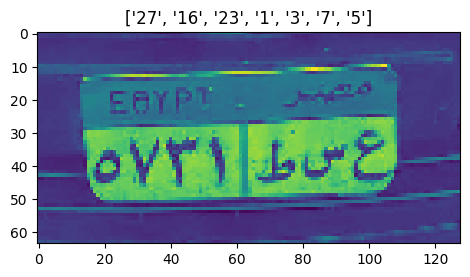

In [12]:
from PIL import Image
plt.figure(figsize = (12,10))
plt.subplot(1,2,1)

plt.title(dataset['label'][2])
plt.imshow(config_img[2])
print(config_img[2])

In [13]:

train_dataset['label'][0]

# x_train,x_test,y_train,y_test=train_test_split(config_img,dataset['label'],train_size=0.5)


['19', '22', '14', '1', '8', '2', '7']

In [14]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
   
    
    )
test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
img_path[2]
img_path[200]
train_dataset.head(300)

,img.name,label
0,car001.jpg,"[19, 22, 14, 1, 8, 2, 7]"
1,car002.jpg,"[18, 20, 19, 4, 6, 2, 5]"
2,car003.jpg,"[27, 16, 23, 1, 3, 7, 5]"
3,car004.jpg,"[11, 24, 16, 4, 1, 4, 7]"
4,car005.jpg,"[26, 24, 14, 2, 7, 3, 9]"
...,...,...
295,103.jpg,"[17, 12, 8, 2, 7, 1, 0]"
296,1030.jpg,"[14, 23, 20, 8, 9, 1, 0]"
297,1031.jpg,"[22, 17, 20, 3, 4, 9, 0]"
298,1032.jpg,"[11, 23, 24, 7, 8, 4, 6]"


In [16]:
train_dataset['label'][102]

['19', '25', '12', '1', '6', '7', '9']

[[ 98 105 114 ... 106 104 102]
 [ 99 109 116 ... 100 101 102]
 [109 113 116 ...  97  96  95]
 ...
 [178 182 190 ...  91  91  91]
 [181 182 178 ...  91  92  93]
 [185 182 189 ... 103 102  96]]


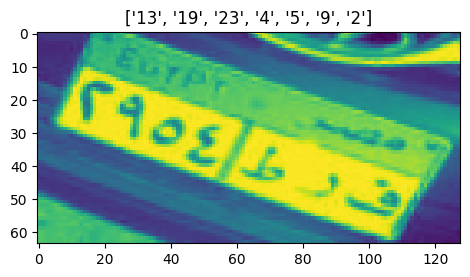

In [26]:
plt.figure(figsize = (12,10))
plt.subplot(1,2,1)

plt.title(train_dataset['label'][900])
plt.imshow(config_img[900])
print(config_img[50])

In [27]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_dataset,
    directory=config_img,
                  x_col='img.name',
                  y_col='label',
                  target_size =(128, 64),  # target_size = input image size
                
                  )

# # train_generator= train_datagen.flow_from_directory(
# #   x_train
  
# # )

# # test_generator = test_datagen.flow_from_dataframe(
# #                     x_test,
# #                     target_size =(150, 150),
# #                     batch_size = 20,
# #                     class_mode ='binary')

TypeError: expected str, bytes or os.PathLike object, not list

In [20]:
from keras.layers import Activation, Dense

model =tf.keras.models.Sequential([
 tf.keras.layers.Conv2D(32, (3,3), activation='relu' ,
 input_shape=(128, 64, 3)),
 tf.keras.layers.MaxPooling2D(2, 2),
 tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
 tf.keras.layers.MaxPooling2D(2,2),
 tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
 tf.keras.layers.MaxPooling2D(2,2),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(512, activation='relu'),
 tf.keras.layers.Dense(128, activation='relu'),
#  tf.keras.layers.Dense(1, activation='softmax'),
#  tf.keras.layers.Dense(1, activation='softmax'),
#  tf.keras.layers.Dense(1, activation='softmax'),
#  tf.keras.layers.Dense(1, activation='softmax'),
#  tf.keras.layers.Dense(1, activation='softmax'),
#  tf.keras.layers.Dense(1, activation='softmax'),
 tf.keras.layers.Dense(29, activation='softmax'), 
  
 ])




In [21]:
model.compile(
    loss='categorical_crossentropy',
 optimizer='adam',
# RMSprop(lr=0.001)
 metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 62, 32)       896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 6, 128)       0

In [25]:
model.fit(
    train_generator,
    
    
    epochs=5,
    )

Epoch 1/5
18/63 [=======>......................] - ETA: 19s - loss: 8065051.5000 - accuracy: 0.1788

KeyboardInterrupt: 